Part I Q1

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import time
from torch import nn as nn
from torch.nn.functional import normalize
from PIL import Image
from torchvision import datasets
from torchvision import transforms

In [ ]:
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train = True, download = True)
cifar10_val = datasets.CIFAR10(data_path, train = False, download = True)
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


In [ ]:
len(cifar10)

50000

In [ ]:
img, label = cifar10[95]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F530E47D1F0>, 6, 'frog')

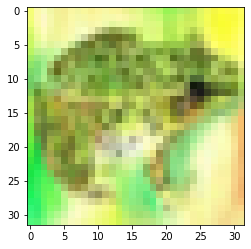

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim = 1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim = 1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [ ]:
transformed_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))

In [ ]:
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size = 150, shuffle = True)

In [ ]:
model = nn.Sequential(nn.Linear(3072, 512),
                     nn.Tanh(),
                     nn.Linear(512, 10),
                     nn.LogSoftmax(dim=1))

learning_rate = 1e-3
optimizer = optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

In [ ]:
tot1 = time.process_time()
for epoch in range(1,n_epochs+1):
  t1 = time.process_time()
  loss_train = 0.0
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    loss = loss_fn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_train += loss.item()
  t2 = time.process_time()

  #print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
  print(f"Epoch: %d, Training Loss: %f, Time: {round(t2-t1,4)} seconds" % (epoch, float(loss)))
tot2 = time.process_time()
print(f"Total Time: {round(tot2-tot1,4)} seconds")


Epoch: 1, Training Loss: 1.769814, Time: 20.2738 seconds
Epoch: 2, Training Loss: 1.765839, Time: 20.2139 seconds
Epoch: 3, Training Loss: 1.629620, Time: 20.0953 seconds
Epoch: 4, Training Loss: 1.789978, Time: 20.0266 seconds
Epoch: 5, Training Loss: 1.660119, Time: 19.9243 seconds
Epoch: 6, Training Loss: 1.557614, Time: 19.9228 seconds
Epoch: 7, Training Loss: 1.676100, Time: 20.9394 seconds
Epoch: 8, Training Loss: 1.712393, Time: 20.4684 seconds
Epoch: 9, Training Loss: 1.662656, Time: 19.9176 seconds
Epoch: 10, Training Loss: 1.546021, Time: 19.9101 seconds
Epoch: 11, Training Loss: 1.584004, Time: 19.9101 seconds
Epoch: 12, Training Loss: 1.477909, Time: 19.8376 seconds
Epoch: 13, Training Loss: 1.567598, Time: 19.9566 seconds
Epoch: 14, Training Loss: 1.487451, Time: 20.0141 seconds
Epoch: 15, Training Loss: 1.582643, Time: 20.0614 seconds
Epoch: 16, Training Loss: 1.332706, Time: 20.7792 seconds
Epoch: 17, Training Loss: 1.450934, Time: 20.014 seconds
Epoch: 18, Training Loss

In [ ]:
transformed_cifar10_val = datasets.CIFAR10(data_path, train = False, download = False, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))
val_loader = torch.utils.data.DataLoader(transformed_cifar10_val, batch_size = 150, shuffle = False)

In [ ]:
correct = 0
total = 0

t3 = time.process_time()
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
t4= time.process_time()
print(f"Accuracy: {round(correct/total, 3)}, Time: {round(t4 - t3, 3)} seconds")

Accuracy: 0.469, Time: 3.279 seconds


Part I Q2

In [ ]:
model2 = nn.Sequential(nn.Linear(3072, 512),
                     nn.Tanh(),
                     nn.Linear(512, 128),
                     nn.Tanh(),
                     nn.Linear(128, 64),
                     nn.Tanh(),
                     nn.Linear(64, 16),
                     nn.LogSoftmax(dim=1))

optimizer2 = optim.SGD(model2.parameters(), lr = learning_rate)
loss_fn2 = nn.CrossEntropyLoss()

In [ ]:
tot3 = time.process_time()
for epoch in range(1,n_epochs+1):
  t5 = time.process_time()
  loss_train = 0.0
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model2(imgs.view(batch_size, -1))
    loss = loss_fn2(outputs, labels)

    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

    loss_train += loss.item()
  t6 = time.process_time()

  #print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
  print(f"Epoch: %d, Training Loss: %f, Time: {round(t6-t5,4)} seconds" % (epoch, float(loss)))
tot4 = time.process_time()
print(f"Total Time: {round(tot4-tot3,4)} seconds")


Epoch: 1, Training Loss: 2.195786, Time: 21.9852 seconds
Epoch: 2, Training Loss: 2.101866, Time: 21.3548 seconds
Epoch: 3, Training Loss: 1.918546, Time: 21.5113 seconds
Epoch: 4, Training Loss: 1.923468, Time: 21.4547 seconds
Epoch: 5, Training Loss: 1.932271, Time: 21.5727 seconds
Epoch: 6, Training Loss: 1.718220, Time: 21.6506 seconds
Epoch: 7, Training Loss: 1.727247, Time: 21.3284 seconds
Epoch: 8, Training Loss: 1.763041, Time: 20.8493 seconds
Epoch: 9, Training Loss: 1.769154, Time: 20.9327 seconds
Epoch: 10, Training Loss: 1.667553, Time: 21.8751 seconds
Epoch: 11, Training Loss: 1.639545, Time: 20.9658 seconds
Epoch: 12, Training Loss: 1.600632, Time: 20.9499 seconds
Epoch: 13, Training Loss: 1.505273, Time: 21.2031 seconds
Epoch: 14, Training Loss: 1.613857, Time: 21.0364 seconds
Epoch: 15, Training Loss: 1.555218, Time: 21.1158 seconds
Epoch: 16, Training Loss: 1.586445, Time: 20.5558 seconds
Epoch: 17, Training Loss: 1.570115, Time: 20.7841 seconds
Epoch: 18, Training Los

In [ ]:
correct = 0
total = 0

t5 = time.process_time()
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
t6= time.process_time()
print(f"Accuracy: {round(correct/total, 3)}, Time: {round(t6 - t5, 3)} seconds")

Accuracy: 0.448, Time: 4.444 seconds


Part I Q2

In [ ]:
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
print(f"{device} Training")

cpu Training


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size = 3, padding = 1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    tot5 = time.process_time()
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        t7 = time.process_time()
        for imgs, labels in train_loader:
            imgs = imgs.to(device = device)
            labels = labels.to(device = device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        t8 = time.process_time()
        print(f"Epoch: %d, Training Loss: %f, Time: {round(t8-t7,4)}" % (epoch, float(loss)))
    tot6 = time.process_time()
    print(f"Total Time: {round(tot6-tot5,4)} seconds")

In [ ]:
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        t9 = time.process_time()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device = device)
                labels = labels.to(device = device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        t10 = time.process_time()
            
        print(f"Type: {name}, Accuracy: {round(correct/total, 3)}, Time: {round(t10-t9, 4)} seconds")

In [ ]:
modelCNN = Net()
if torch.cuda.is_available():
  modelCNN.cuda()
optimizerCNN = optim.SGD(modelCNN.parameters(), lr = learning_rate)
loss_fnCNN = nn.CrossEntropyLoss()

training_loop(n_epochs,optimizerCNN, modelCNN, loss_fnCNN, train_loader)

Epoch: 1, Training Loss: 2.310158, Time: 36.9677
Epoch: 2, Training Loss: 2.022371, Time: 37.5874
Epoch: 3, Training Loss: 2.018423, Time: 37.7519
Epoch: 4, Training Loss: 2.076935, Time: 37.9092
Epoch: 5, Training Loss: 1.787677, Time: 37.2828
Epoch: 6, Training Loss: 1.883313, Time: 37.7134
Epoch: 7, Training Loss: 1.989109, Time: 36.6564
Epoch: 8, Training Loss: 2.009430, Time: 37.0749
Epoch: 9, Training Loss: 1.947320, Time: 37.3978
Epoch: 10, Training Loss: 1.815207, Time: 36.6094
Epoch: 11, Training Loss: 1.904891, Time: 36.6376
Epoch: 12, Training Loss: 2.303844, Time: 36.9523
Epoch: 13, Training Loss: 1.849602, Time: 36.6327
Epoch: 14, Training Loss: 2.023801, Time: 38.1988
Epoch: 15, Training Loss: 1.658250, Time: 36.5738
Epoch: 16, Training Loss: 1.818741, Time: 36.207
Epoch: 17, Training Loss: 1.344258, Time: 36.5084
Epoch: 18, Training Loss: 1.483084, Time: 37.9684
Epoch: 19, Training Loss: 1.426981, Time: 37.4061
Epoch: 20, Training Loss: 1.418269, Time: 37.5173
Epoch: 21,

In [ ]:
validate(modelCNN, train_loader, val_loader)


Type: train, Accuracy: 0.684, Time: 30.26 seconds
Type: val, Accuracy: 0.655, Time: 5.6859 seconds


Part II Q2

In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding = 1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 18, kernel_size = 3, padding = 1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(18, 4, kernel_size = 3, padding = 1)
        self.act3 = nn.Tanh()
        self.pool3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(4 * 4 * 4, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 15)
        
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = self.pool3(self.act3(self.conv3(out)))
        out = out.view(-1, 4 * 4 * 4)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    tot5 = time.process_time()
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        t7 = time.process_time()
        for imgs, labels in train_loader:
            imgs = imgs.to(device = device)
            labels = labels.to(device = device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        t8 = time.process_time()
        print(f"Epoch: %d, Training Loss: %f, Time: {round(t8-t7,4)}" % (epoch, float(loss)))
    tot6 = time.process_time()
    print(f"Total Time: {round(tot6-tot5,4)} seconds")

In [ ]:
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        t9 = time.process_time()
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device = device)
                labels = labels.to(device = device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        t10 = time.process_time()
            
        print(f"Type: {name}, Accuracy: {round(correct/total, 3)}, Time: {round(t10-t9, 4)} seconds")

In [ ]:
modelCNN2 = Net2()
if torch.cuda.is_available():
  modelCNN2.cuda()
optimizerCNN2 = optim.SGD(modelCNN2.parameters(), lr = learning_rate)
loss_fnCNN2 = nn.CrossEntropyLoss()

training_loop(n_epochs, optimizerCNN2, modelCNN2, loss_fnCNN2, train_loader)

Epoch: 1, Training Loss: 2.662158, Time: 13.6426
Epoch: 2, Training Loss: 2.634050, Time: 11.8564
Epoch: 3, Training Loss: 2.614000, Time: 12.9294
Epoch: 4, Training Loss: 2.570090, Time: 11.697
Epoch: 5, Training Loss: 2.540844, Time: 11.6525
Epoch: 6, Training Loss: 2.525605, Time: 11.6581
Epoch: 7, Training Loss: 2.492418, Time: 11.7993
Epoch: 8, Training Loss: 2.452300, Time: 11.6765
Epoch: 9, Training Loss: 2.429855, Time: 11.8749
Epoch: 10, Training Loss: 2.393336, Time: 11.6631


In [ ]:
validate(modelCNN2, train_loader, val_loader)